# Install Libraries

In [ ]:
!pip install tensorflow

# Import Libraries

This section imports the necessary libraries for data manipulation, model building, and plotting.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# Load & Analyze TCS Stock Dataset

This section loads the TCS dataset from a CSV file and performs a basic analysis to understand its structure.

In [ ]:
url = "https://raw.githubusercontent.com/kalilurrahman/TCSData/main/TCS_stock_history.csv"
df = pd.read_csv(url, index_col=0)
print(df.info())
print("\nDataset is for a single stock: TCS")
print("\nFirst few rows:\n", df.head())
print("\nLast few rows:\n", df.tail())
print("\nDataset statistics:\n", df.describe())
print("\nColumns in dataset:", df.columns.tolist())


<class 'pandas.core.frame.DataFrame'>
Index: 4463 entries, 2002-08-12 to 2021-09-30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          4463 non-null   float64
 1   High          4463 non-null   float64
 2   Low           4463 non-null   float64
 3   Close         4463 non-null   float64
 4   Volume        4463 non-null   int64  
 5   Dividends     4463 non-null   float64
 6   Stock Splits  4463 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 278.9+ KB
None

Dataset is for a single stock: TCS

First few rows:
                  Open       High        Low      Close  Volume  Dividends  \
Date                                                                        
2002-08-12  28.794172  29.742206  28.794172  29.519140  212976        0.0   
2002-08-13  29.556316  30.030333  28.905705  29.119476  153576        0.0   
2002-08-14  29.184536  29.184536  26.563503  27.111877  822776        0.0   


# Visualize Stock Prices and Volume (for TCS)

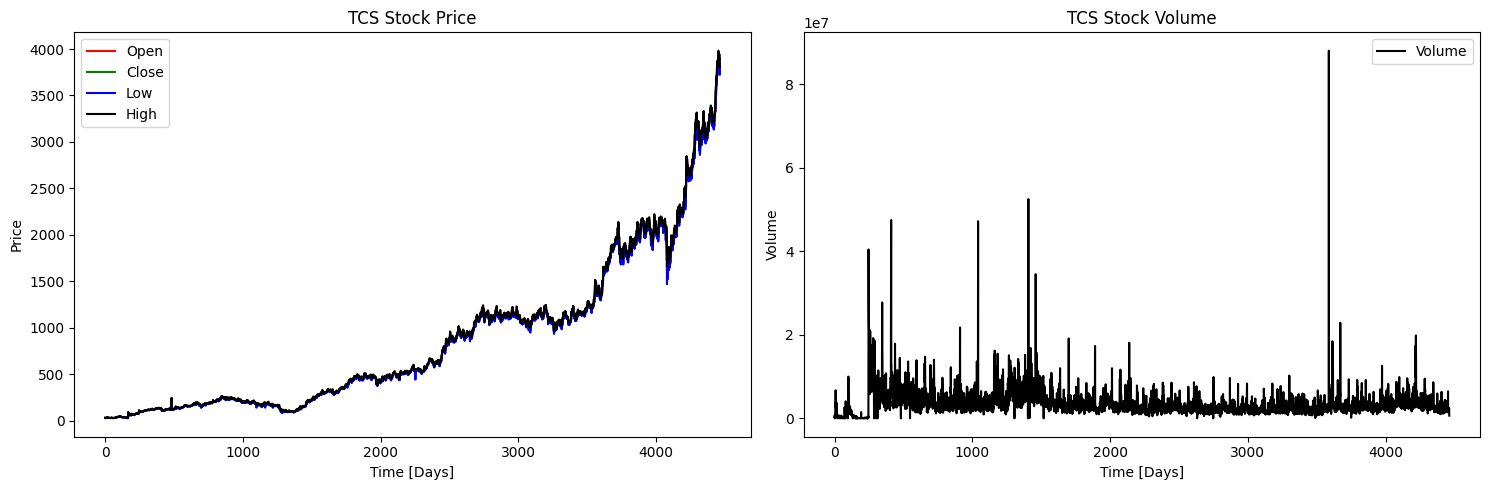

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(df['Open'].values, color='red', label='Open')
plt.plot(df['Close'].values, color='green', label='Close')
plt.plot(df['Low'].values, color='blue', label='Low')
plt.plot(df['High'].values, color='black', label='High')
plt.title('TCS Stock Price')
plt.xlabel('Time [Days]')
plt.ylabel('Price')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(df['Volume'].values, color='black', label='Volume')
plt.title('TCS Stock Volume')
plt.xlabel('Time [Days]')
plt.ylabel('Volume')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
def normalize_data_together(df):
    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return df_scaled, scaler

df_scaled, scaler = normalize_data_together(df)

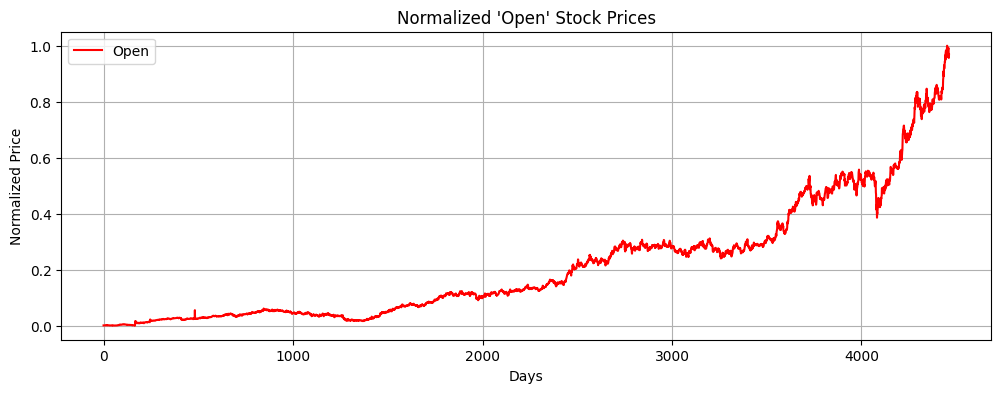

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(df_scaled['Open'], label='Open', color='red')
plt.title("Normalized 'Open' Stock Prices")
plt.xlabel("Days")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid(True)
plt.show()

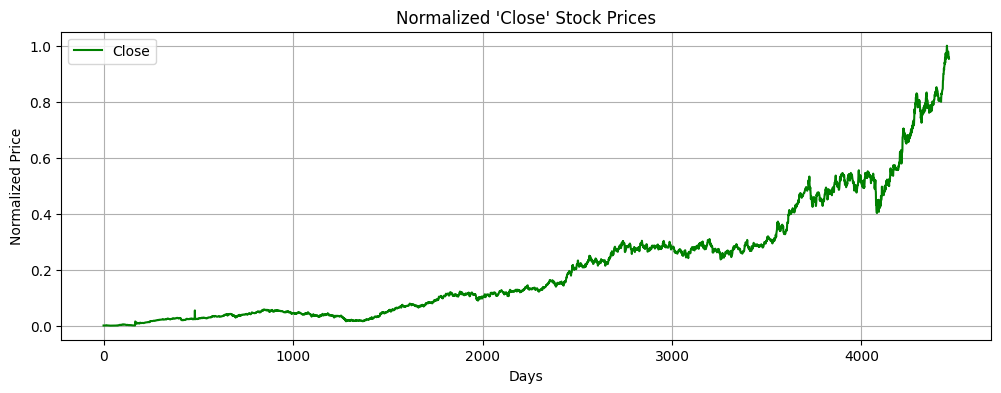

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(df_scaled['Close'], label='Close', color='green')
plt.title("Normalized 'Close' Stock Prices")
plt.xlabel("Days")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid(True)
plt.show()

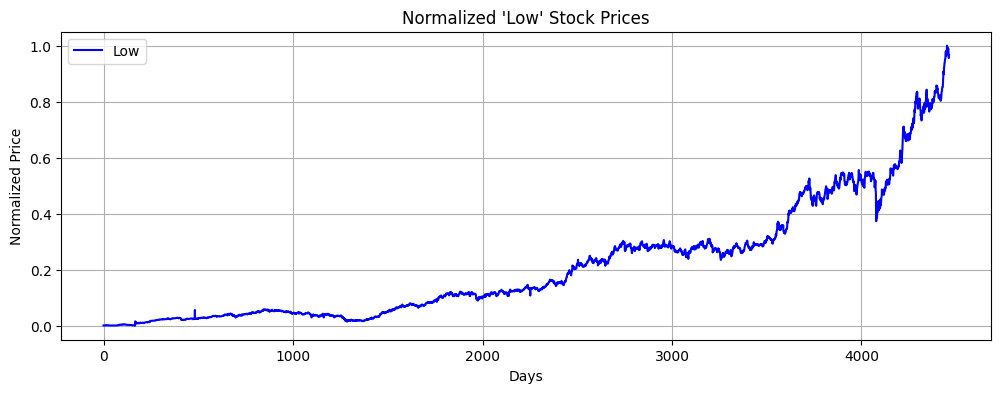

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(df_scaled['Low'], label='Low', color='blue')
plt.title("Normalized 'Low' Stock Prices")
plt.xlabel("Days")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid(True)
plt.show()

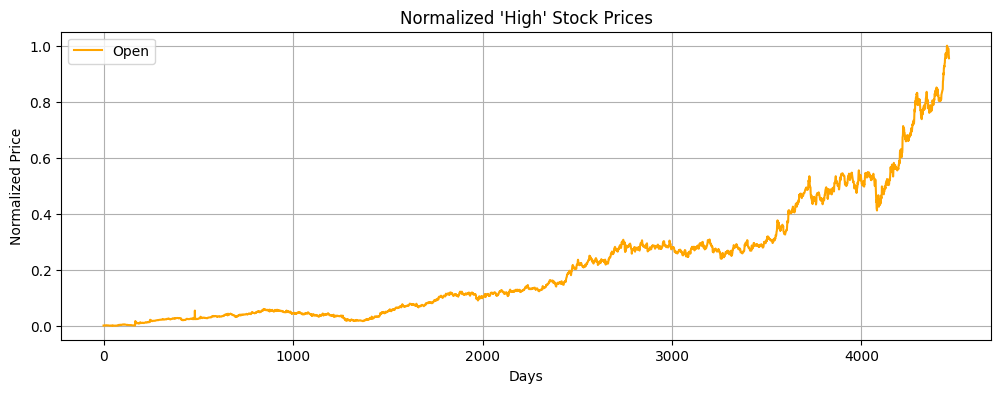

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(df_scaled['High'], label='Open', color='orange')
plt.title("Normalized 'High' Stock Prices")
plt.xlabel("Days")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid(True)
plt.show()

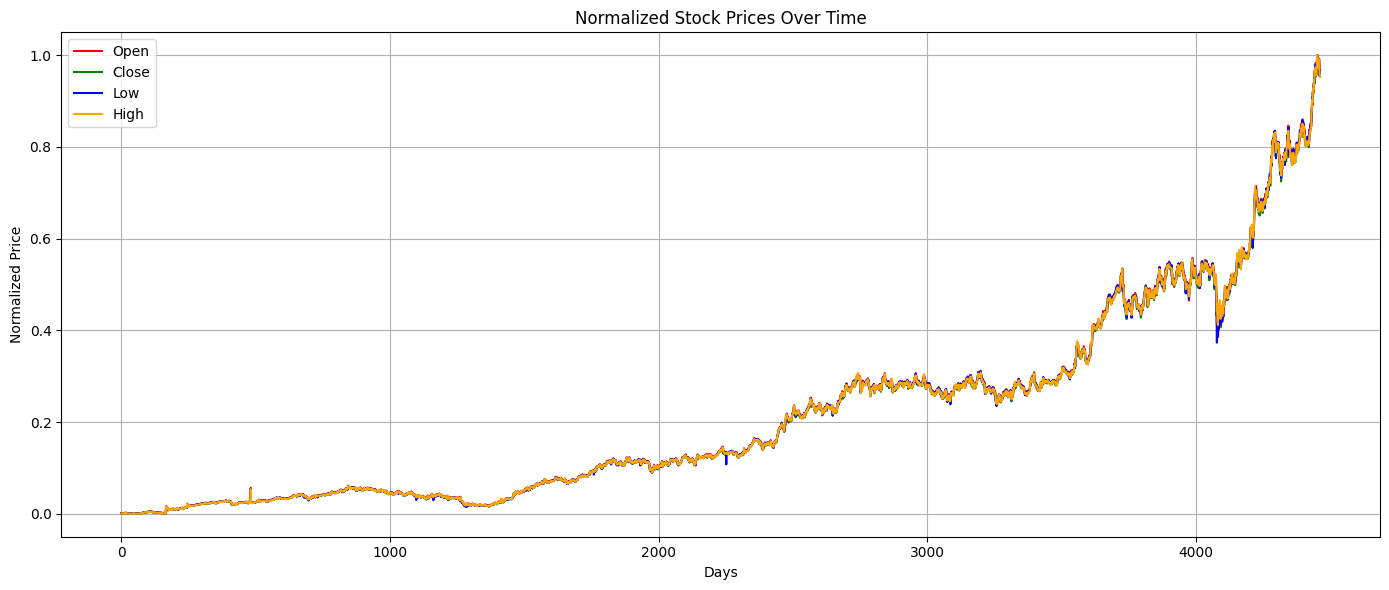

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(df_scaled['Open'], label='Open', color='red')
plt.plot(df_scaled['Close'], label='Close', color='green')
plt.plot(df_scaled['Low'], label='Low', color='blue')
plt.plot(df_scaled['High'], label='High', color='orange')
plt.title("Normalized Stock Prices Over Time")
plt.xlabel("Days")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Sequence Creation (Close Price) and Train Test Split

Creating time-series sequences for predicting the Close price.

Splitting data into training (80%) and testing (20%) sets.

In [ ]:
def create_multivariate_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len, 3])
    return np.array(X), np.array(y)

SEQ_LEN = 100
data_array = df_scaled.values
X, y = create_multivariate_sequences(data_array, SEQ_LEN)

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


# LSTM Model (Close Price)

Building and training an LSTM model for Close price prediction.

In [ ]:
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


99/99 ━━━━━━━━━━━━━━━━━━━━ 33s 294ms/step - loss: 0.0014 - val_loss: 1.2199e-04
Epoch 2/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 42s 301ms/step - loss: 1.6769e-04 - val_loss: 5.5520e-04
Epoch 3/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 40s 292ms/step - loss: 1.7073e-04 - val_loss: 9.9722e-05
Epoch 4/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 41s 290ms/step - loss: 1.5577e-04 - val_loss: 2.6180e-04
Epoch 5/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 43s 306ms/step - loss: 1.3842e-04 - val_loss: 3.8228e-04
Epoch 6/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 29s 290ms/step - loss: 1.3794e-04 - val_loss: 1.0489e-04
Epoch 7/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 41s 289ms/step - loss: 1.0696e-04 - val_loss: 2.0000e-04
Epoch 8/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 41s 289ms/step - loss: 1.1921e-04 - val_loss: 1.1470e-04
Epoch 9/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 30s 299ms/step - loss: 1.1300e-04 - val_loss: 2.0724e-04
Epoch 10/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 40s 292ms/step - loss: 1.3510e-04 - val_loss: 1.7519e-04
Epoch 11/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 41s 289ms/step 

# Prediction & Evaluation (Close Price)


Inverse scaling predictions and evaluating model performance.

In [ ]:
y_pred = model.predict(X_test)

close_scaler = MinMaxScaler()
close_scaler.min_, close_scaler.scale_ = scaler.min_[3], scaler.scale_[3]

y_pred_inv = close_scaler.inverse_transform(y_pred)
y_test_inv = close_scaler.inverse_transform(y_test.reshape(-1, 1))


28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step


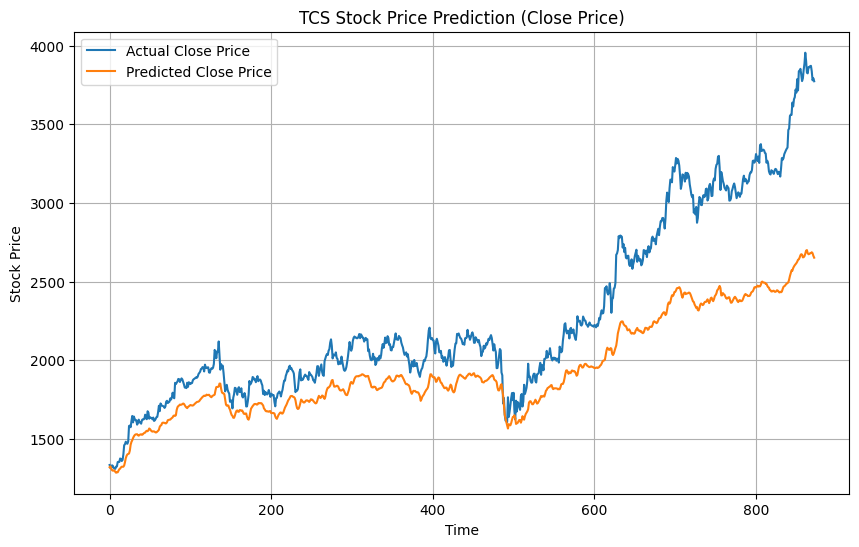

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='Actual Close Price')
plt.plot(y_pred_inv, label='Predicted Close Price')
plt.title('TCS Stock Price Prediction (Close Price)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


RMSE: 434.24
MAE: 335.05


# Sequence Creation (Open Price)

Modifying sequence creation for Open price prediction.

In [ ]:
def create_multivariate_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len, 0])
    return np.array(X), np.array(y)

SEQ_LEN = 80
data_array = df_scaled.values
X, y = create_multivariate_sequences(data_array, SEQ_LEN)

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


# LSTM Model (Open Price)

Adjusting and training the LSTM model for Open price prediction.

In [ ]:
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


99/99 ━━━━━━━━━━━━━━━━━━━━ 29s 253ms/step - loss: 0.0022 - val_loss: 1.1424e-04
Epoch 2/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 40s 240ms/step - loss: 1.8451e-04 - val_loss: 1.8029e-04
Epoch 3/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 24s 245ms/step - loss: 1.4777e-04 - val_loss: 7.9596e-05
Epoch 4/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 41s 241ms/step - loss: 1.2173e-04 - val_loss: 3.9713e-04
Epoch 5/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 41s 245ms/step - loss: 1.4732e-04 - val_loss: 6.3002e-05
Epoch 6/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 41s 248ms/step - loss: 1.3523e-04 - val_loss: 2.1262e-04
Epoch 7/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 41s 245ms/step - loss: 1.1081e-04 - val_loss: 4.1048e-04
Epoch 8/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 40s 240ms/step - loss: 1.2359e-04 - val_loss: 5.6584e-05
Epoch 9/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 41s 242ms/step - loss: 1.0275e-04 - val_loss: 2.7654e-04
Epoch 10/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 41s 241ms/step - loss: 9.3606e-05 - val_loss: 9.1726e-05
Epoch 11/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 41s 240ms/step 

# Prediction & Evaluation (Open Price)

Inverse scaling and evaluating Open price predictions.

In [ ]:
y_pred = model.predict(X_test)

open_scaler = MinMaxScaler()
open_scaler.min_, open_scaler.scale_ = scaler.min_[0], scaler.scale_[0]
y_pred_inv = open_scaler.inverse_transform(y_pred)
y_test_inv = open_scaler.inverse_transform(y_test.reshape(-1, 1))

28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step


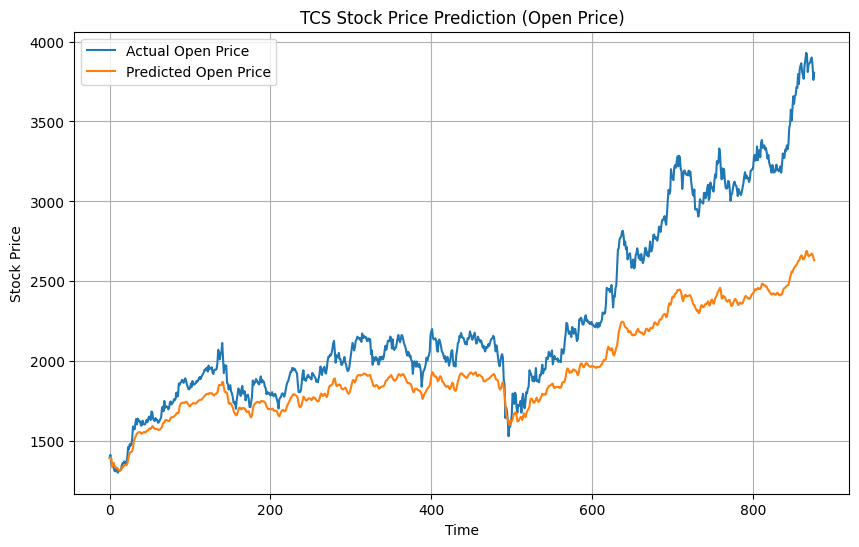

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='Actual Open Price')
plt.plot(y_pred_inv, label='Predicted Open Price')
plt.title('TCS Stock Price Prediction (Open Price)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


RMSE: 434.30
MAE: 323.76
